In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
years = [str(y) for y in range(2001,2018)]
columns = ["Area code", "Area name"] + years
growth_boroughs = ['Greenwich', 'Hackney', 'Newham', 'Tower Hamlets', 'Barking and Dagenham', 'Waltham Forest']

boroughs = ['City of London', 'Barking and Dagenham', 'Barnet', 'Bexley',
       'Brent', 'Bromley', 'Camden', 'Croydon', 'Ealing', 'Enfield',
       'Greenwich', 'Hackney', 'Hammersmith and Fulham', 'Haringey',
       'Harrow', 'Havering', 'Hillingdon', 'Hounslow', 'Islington',
       'Kensington and Chelsea', 'Kingston-upon-Thames', 'Lambeth',
       'Lewisham', 'Merton', 'Newham', 'Redbridge',
       'Richmond-upon-Thames', 'Southwark', 'Sutton', 'Tower Hamlets',
       'Waltham Forest', 'Wandsworth', 'Westminster']

west_boroughs = list(set(boroughs).difference(set(growth_boroughs)))

In [4]:
west_boroughs

['Hammersmith and Fulham',
 'Sutton',
 'Enfield',
 'Haringey',
 'Richmond-upon-Thames',
 'Kingston-upon-Thames',
 'Hounslow',
 'Merton',
 'Lambeth',
 'Wandsworth',
 'Harrow',
 'Lewisham',
 'Kensington and Chelsea',
 'Westminster',
 'Bexley',
 'Hillingdon',
 'Havering',
 'Croydon',
 'Barnet',
 'Brent',
 'Camden',
 'Islington',
 'Ealing',
 'Redbridge',
 'Bromley',
 'Southwark',
 'City of London']

In [5]:
def plot_boroughs(data):
    plt.xticks(np.arange(0,18),years, rotation=90)
    for borough in growth_boroughs:
        borough_by_year = data[data['Area name'] == borough]
        if borough_by_year.empty:
            continue
        borough_by_year = borough_by_year.drop(['Area code','Area name'], axis=1).values[0]

        plt.plot(borough_by_year, label=borough)
    plt.legend()
    plt.show()

# Number of pubs by borough

In [6]:
pubs_units = pd.read_excel("../data/pubs-borough-msoa.xls", sheet_name="Pubs units", skiprows=4, names=columns)
pubs_units_boroughs = pubs_units[pubs_units['Area name'].isin(growth_boroughs)]

pubs_units_boroughs

,Area code,Area name,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
2,E09000002,Barking and Dagenham,45.0,40.0,45.0,40.0,40.0,40.0,30.0,30.0,25.0,25.0,25.0,30.0,20.0,20.0,25.0,20.0,20.0
11,E09000011,Greenwich,115.0,115.0,105.0,110.0,105.0,100.0,90.0,100.0,85.0,90.0,85.0,85.0,85.0,85.0,85.0,70.0,75.0
12,E09000012,Hackney,155.0,155.0,135.0,135.0,135.0,130.0,125.0,130.0,125.0,120.0,125.0,135.0,145.0,150.0,155.0,160.0,175.0
25,E09000025,Newham,105.0,100.0,90.0,90.0,75.0,80.0,75.0,70.0,70.0,60.0,55.0,50.0,50.0,50.0,45.0,50.0,50.0
30,E09000030,Tower Hamlets,205.0,200.0,175.0,165.0,165.0,170.0,165.0,160.0,150.0,150.0,150.0,140.0,135.0,125.0,125.0,130.0,120.0
31,E09000031,Waltham Forest,90.0,95.0,75.0,80.0,75.0,80.0,80.0,75.0,80.0,75.0,70.0,65.0,60.0,55.0,50.0,50.0,45.0


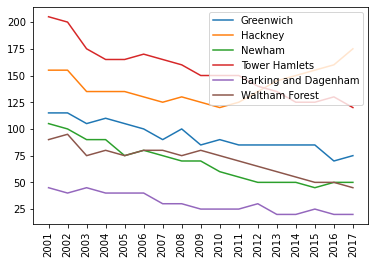

In [7]:
plot_boroughs(pubs_units_boroughs)

In [8]:
pubs_units.dropna(inplace=True)
pubs_units.head()

,Area code,Area name,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,E12000007,London,4835.0,4875.0,4530.0,4455.0,4445.0,4335.0,4295.0,4210.0,4025.0,3890.0,3770.0,3770.0,3665.0,3615.0,3675.0,3615.0,3530.0
1,E09000001,City of London,200.0,195.0,180.0,180.0,200.0,185.0,200.0,195.0,185.0,190.0,175.0,165.0,155.0,160.0,150.0,150.0,160.0
2,E09000002,Barking and Dagenham,45.0,40.0,45.0,40.0,40.0,40.0,30.0,30.0,25.0,25.0,25.0,30.0,20.0,20.0,25.0,20.0,20.0
3,E09000003,Barnet,135.0,135.0,130.0,120.0,125.0,120.0,115.0,120.0,110.0,95.0,95.0,95.0,85.0,90.0,95.0,100.0,80.0
4,E09000004,Bexley,95.0,95.0,95.0,100.0,105.0,105.0,105.0,105.0,90.0,95.0,95.0,95.0,95.0,85.0,90.0,90.0,95.0


In [12]:
multipliers_2005 = pubs_units[years].div(pubs_units["2005"], axis=0)
percentage_changes_num_2005 = multipliers_2005.sub(1)
percentage_changes_2005 = pd.concat([pubs_units.iloc[:, :2], percentage_changes_num_2005], axis=1)
percentage_changes_2005.head()

,Area code,Area name,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,E12000007,London,0.087739,0.096738,0.019123,0.002250,0.0,-0.024747,-0.033746,-0.052868,-0.094488,-0.124859,-0.151856,-0.151856,-0.175478,-0.186727,-0.173228,-0.186727,-0.205849
1,E09000001,City of London,0.000000,-0.025000,-0.100000,-0.100000,0.0,-0.075000,0.000000,-0.025000,-0.075000,-0.050000,-0.125000,-0.175000,-0.225000,-0.200000,-0.250000,-0.250000,-0.200000
2,E09000002,Barking and Dagenham,0.125000,0.000000,0.125000,0.000000,0.0,0.000000,-0.250000,-0.250000,-0.375000,-0.375000,-0.375000,-0.250000,-0.500000,-0.500000,-0.375000,-0.500000,-0.500000
3,E09000003,Barnet,0.080000,0.080000,0.040000,-0.040000,0.0,-0.040000,-0.080000,-0.040000,-0.120000,-0.240000,-0.240000,-0.240000,-0.320000,-0.280000,-0.240000,-0.200000,-0.360000
4,E09000004,Bexley,-0.095238,-0.095238,-0.095238,-0.047619,0.0,0.000000,0.000000,0.000000,-0.142857,-0.095238,-0.095238,-0.095238,-0.095238,-0.190476,-0.142857,-0.142857,-0.095238


In [13]:
multipliers_2011 = pubs_units[years].div(pubs_units["2011"], axis=0)
percentage_changes_num_2011 = multipliers_2011.sub(1)
percentage_changes_2011 = pd.concat([pubs_units.iloc[:, :2], percentage_changes_num_2011], axis=1)
percentage_changes_2011.head()

,Area code,Area name,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,E12000007,London,0.282493,0.293103,0.201592,0.181698,0.179045,0.149867,0.139257,0.116711,0.067639,0.031830,0.0,0.000000,-0.027851,-0.041114,-0.025199,-0.041114,-0.063660
1,E09000001,City of London,0.142857,0.114286,0.028571,0.028571,0.142857,0.057143,0.142857,0.114286,0.057143,0.085714,0.0,-0.057143,-0.114286,-0.085714,-0.142857,-0.142857,-0.085714
2,E09000002,Barking and Dagenham,0.800000,0.600000,0.800000,0.600000,0.600000,0.600000,0.200000,0.200000,0.000000,0.000000,0.0,0.200000,-0.200000,-0.200000,0.000000,-0.200000,-0.200000
3,E09000003,Barnet,0.421053,0.421053,0.368421,0.263158,0.315789,0.263158,0.210526,0.263158,0.157895,0.000000,0.0,0.000000,-0.105263,-0.052632,0.000000,0.052632,-0.157895
4,E09000004,Bexley,0.000000,0.000000,0.000000,0.052632,0.105263,0.105263,0.105263,0.105263,-0.052632,0.000000,0.0,0.000000,0.000000,-0.105263,-0.052632,-0.052632,0.000000


In [15]:
def plot_all_boroughs(data):
    plt.xticks(np.arange(0,18),years, rotation=90)
    
    for borough in west_boroughs:
        borough_by_year = data[data['Area name'] == borough]
        if borough_by_year.empty:
            continue
        borough_by_year = borough_by_year.drop(['Area code','Area name'], axis=1).values[0]
        plt.plot(borough_by_year, color='gray', linewidth=1, linestyle=':')
        

    for borough in growth_boroughs:
        borough_by_year = data[data['Area name'] == borough]
        if borough_by_year.empty:
            continue
        borough_by_year = borough_by_year.drop(['Area code','Area name'], axis=1).values[0]
        plt.plot(borough_by_year, label=borough, linewidth=2)
        
    plt.legend()
    plt.show()

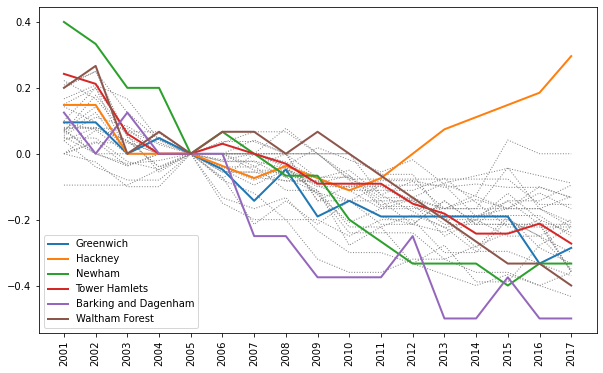

In [16]:
plt.figure(figsize=(10, 6))
plot_all_boroughs(percentage_changes_2005)

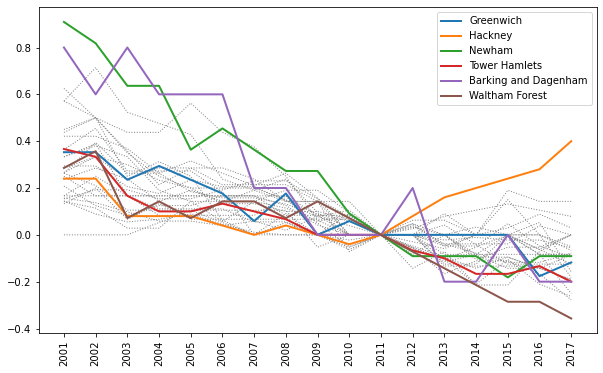

In [17]:
plt.figure(figsize=(10, 6))
plot_all_boroughs(percentage_changes_2011)

# Number of pub employees by borough

In [ ]:
pubs_employees = pd.read_excel("../data/pubs-borough-msoa.xls", sheet_name="Pubs employment", skiprows=4, names=columns)
pubs_employees_boroughs = pubs_employees[pubs_employees['Area name'].isin(growth_boroughs)]

pubs_employees_boroughs

In [ ]:
plot_boroughs(pubs_employees_boroughs)

# Number of small public houses and bars by borough


In [ ]:
small_pubs = pd.read_excel("../data/pubs-borough-msoa.xls", sheet_name="Small Pubs units", skiprows=4, names=columns)
small_pubs_boroughs = small_pubs[small_pubs['Area name'].isin(growth_boroughs)]

small_pubs_boroughs

In [ ]:
plot_boroughs(small_pubs_boroughs)

# Number of employees of small pubs by borough

In [ ]:
small_pubs_employees = pd.read_excel("../data/pubs-borough-msoa.xls", sheet_name="Small Pubs employment", skiprows=4, names=columns)
small_pubs_employees_boroughs = small_pubs_employees[small_pubs_employees['Area name'].isin(growth_boroughs)]

small_pubs_employees_boroughs

In [ ]:
small_pubs_employees_boroughs = small_pubs_employees_boroughs[small_pubs_employees_boroughs['Area name'] != 'Barking and Dagenham']

small_pubs_employees_boroughs

In [ ]:
plot_boroughs(small_pubs_employees_boroughs)